## Handwritten digits classification using neural network
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# show plot in the same window


%matplotlib inline
# import keras module from tensorflow
from tensorflow import keras


In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

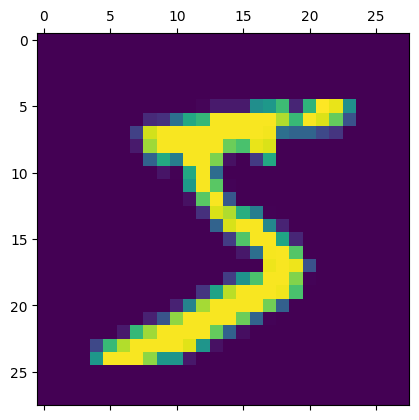

In [7]:
plt.matshow(X_train[0])

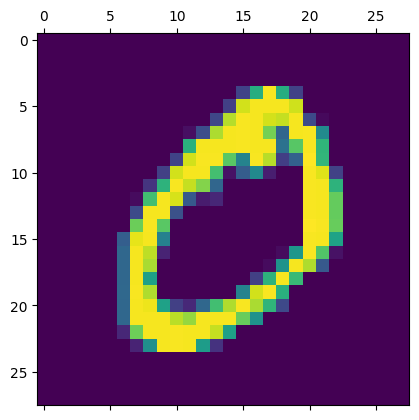

In [8]:
plt.matshow(X_train[1])

In [9]:
y_train[2]

4

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
# Scalling the data, values are between 0 and 255
X_train = X_train/255
X_test = X_test/255

In [13]:
# converting into single dimension array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
# output 10, input 784
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4699 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3040 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9264


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2687 - accuracy: 0.9267


[0.268667072057724, 0.9266999959945679]

In [16]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


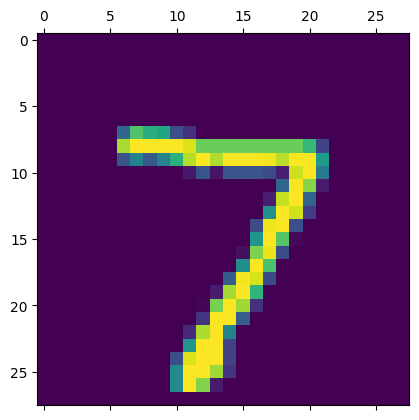

In [17]:
plt.matshow(X_test[0])

In [18]:
y_predicted[0]

array([2.96054799e-02, 3.79217227e-07, 5.34522235e-02, 9.39443409e-01,
       2.36531813e-03, 1.21644855e-01, 1.18748915e-06, 9.99886870e-01,
       8.17807987e-02, 6.45381570e-01], dtype=float32)

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
np.argmax(y_predicted[1])

2

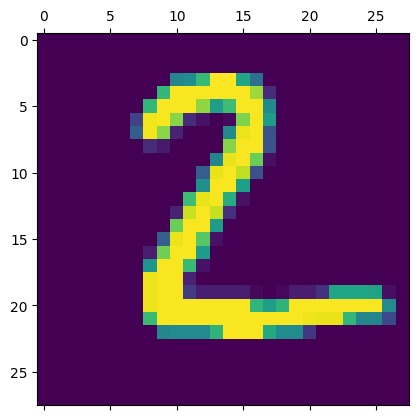

In [21]:
plt.matshow(X_test[1])

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    5,    4,    4,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   5,    9,  917,   18,    8,    5,   13,   12,   41,    4],
       [   4,    0,   18,  906,    0,   35,    2,   16,   23,    6],
       [   1,    1,    5,    1,  913,    0,   10,    5,   10,   36],
       [   8,    3,    1,   23,    9,  793,   13,    6,   29,    7],
       [  12,    3,    5,    1,    7,   17,  909,    2,    2,    0],
       [   1,    5,   22,    4,    3,    0,    0,  969,    3,   21],
       [   6,    7,    7,   16,    9,   31,    9,   15,  868,    6],
       [  11,    7,    1,    9,   21,    7,    0,   32,    6,  915]])>

In [24]:
%pip install seasborn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement seasborn (from versions: none)
ERROR: No matching distribution found for seasborn


Text(95.72222222222221, 0.5, 'Truth')

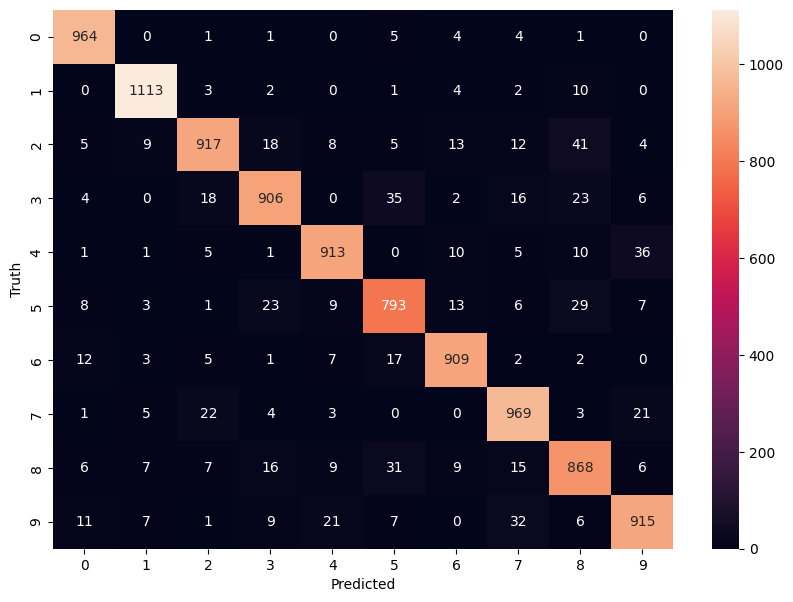

In [26]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [27]:
# adding hidden layers in model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2765 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1275 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0889 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0678 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0536 - accuracy: 0.9834


In [28]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.9766


[0.07765449583530426, 0.9765999913215637]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

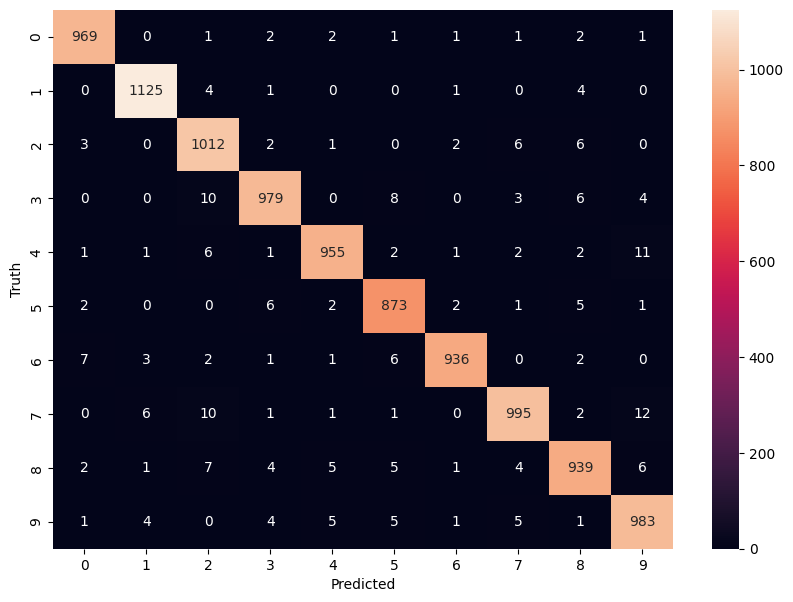

In [29]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [30]:
# flattering the data in keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2745 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1265 - accuracy: 0.9620
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0892 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0671 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0533 - accuracy: 0.9838


In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0890 - accuracy: 0.9720


[0.08900294452905655, 0.972000002861023]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

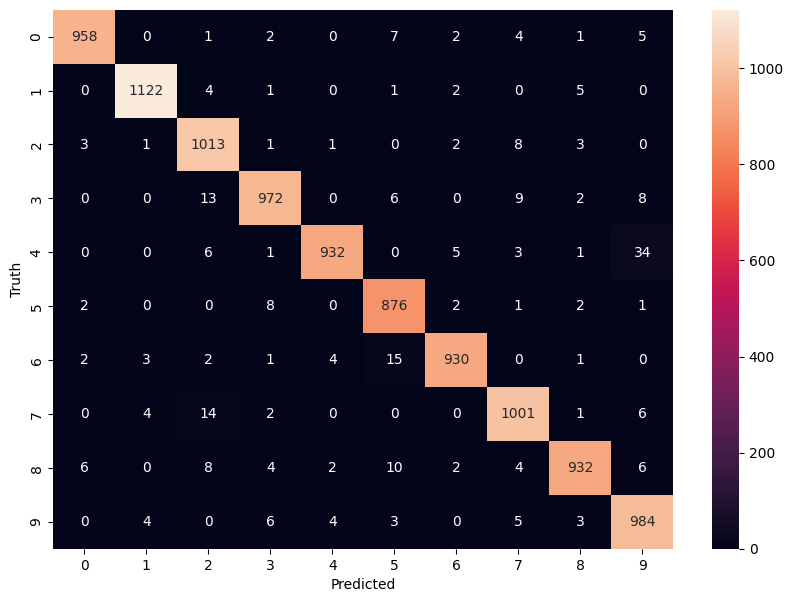

In [32]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")